<a href="https://colab.research.google.com/github/MariaGabriela87/Segunda-entrega/blob/main/Linea_144_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo


## General

El objetivo del presente trabajo es conocer el impacto de la pandemia en las estadísticas sobre llamadas a la línea 144* para atención telefónica especializada a mujeres víctimas de violencia de género.
En función de estos datos intentaremos predecir la probabilidad de ser víctima de violencia en la provincia de Buenos Aires y como cambiaría ante una posible  situación de emergencia sanitaria que incluya una nueva etapa de confinamiento.  

*Linea 144 = Ofrece información, contención y asesoramiento en aquellas temáticas relacionadas con la violencia física, psicológica, sexual, económica y patrimonial, y simbólica. Su objetivo es acompañar en las distintas situaciones, ya sea antes, durante o después de un episodio de violencia.


## Particular

Conocer los datos con los que trabajaremos y evaluar las mejores estrategias para pulir la información.

# Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Linea144 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linea 144.csv', delimiter = ',')
# se agregó encoding ya que tiraba error "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 1: invalid continuation byte"
# Linea_144 = pd.read_csv('Linea_144.csv')

# Detalles de la base

In [ ]:
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533


In [ ]:
Linea144.shape #Cuantas filas y columnas tengo

(89540, 21)

In [ ]:
Linea144.columns #Detalle de columnas

Index(['Anio', 'Fecha', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'poblacion_provincia'],
      dtype='object')

In [ ]:
Linea144.dtypes #Tipo de datos
#Ver mas adelante como cambiar el tipo de dato en columna fecha

Anio                                                   int64
Fecha                                                 object
prov_persona_en_situacion_violencia                   object
genero_persona_en_situacion_de_violencia              object
edad_persona_en_situacion_de_violencia               float64
pais_nacimiento_persona_en_situacion_de_violencia     object
tipo_de_violencia_fisica                              object
tipo_de_violencia_psicologica                         object
tipo_de_violencia_sexual                              object
tipo_de_violencia_economica_y_patrimonial             object
tipo_de_violencia_simbolica                           object
tipo_de_violencia_domestica                           object
modalidad_de_violencia_institucional                  object
modalidad_de_violencia_laboral                        object
modalidad_violencia_contra_libertad_reproductiva      object
modalidad_de_violencia_obstetrica                     object
modalidad_de_violencia_m

# Datos faltantes

In [ ]:
Linea144.isnull().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      1
genero_persona_en_situacion_de_violencia              1904
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

In [ ]:
#Trabajar con datos faltantes
Linea144.dropna(how= 'all')
#Elimino filas vacías

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
2,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
3,2023,1/1/2023,Entre Ríos,Mujer,28.0,NaN,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
4,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89535,2020,12/31/2020,Buenos Aires,Mujer,30.0,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
89536,2020,12/31/2020,Buenos Aires,Mujer,40.0,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
89537,2020,12/31/2020,Buenos Aires,Mujer,22.0,NaN,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
89538,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


In [ ]:
#Datos NA
Linea144.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      1
genero_persona_en_situacion_de_violencia              1904
edad_persona_en_situacion_de_violencia               17278
pais_nacimiento_persona_en_situacion_de_violencia    30281
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

In [ ]:
#Ver valores nulos en prov_persona_en_situación_violencia
Linea144[Linea144['prov_persona_en_situacion_violencia'].isnull()]


,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
204,2023,1/4/2023,NaN,NaN,NaN,NaN,Si,Si,No,Si,...,Si,No,No,No,No,No,No,Pareja,NaN,NaN


In [ ]:
#Elimino la fila con valores faltantes de prov_persona_en_situación_violencia
Linea144.dropna(subset=['prov_persona_en_situacion_violencia'], inplace=True)

In [ ]:
Linea144.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      0
genero_persona_en_situacion_de_violencia              1903
edad_persona_en_situacion_de_violencia               17277
pais_nacimiento_persona_en_situacion_de_violencia    30280
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

In [ ]:
#En porcentajes
Linea144.isna().sum()/Linea144.shape[0] * 100

Anio                                                  0.000000
Fecha                                                 0.000000
prov_persona_en_situacion_violencia                   0.000000
genero_persona_en_situacion_de_violencia              2.125331
edad_persona_en_situacion_de_violencia               19.295503
pais_nacimiento_persona_en_situacion_de_violencia    33.817666
tipo_de_violencia_fisica                              0.000000
tipo_de_violencia_psicologica                         0.000000
tipo_de_violencia_sexual                              0.000000
tipo_de_violencia_economica_y_patrimonial             0.000000
tipo_de_violencia_simbolica                           0.000000
tipo_de_violencia_domestica                           0.000000
modalidad_de_violencia_institucional                  0.000000
modalidad_de_violencia_laboral                        0.000000
modalidad_violencia_contra_libertad_reproductiva      0.000000
modalidad_de_violencia_obstetrica                     0

# Gráficos

## Provincia de origen

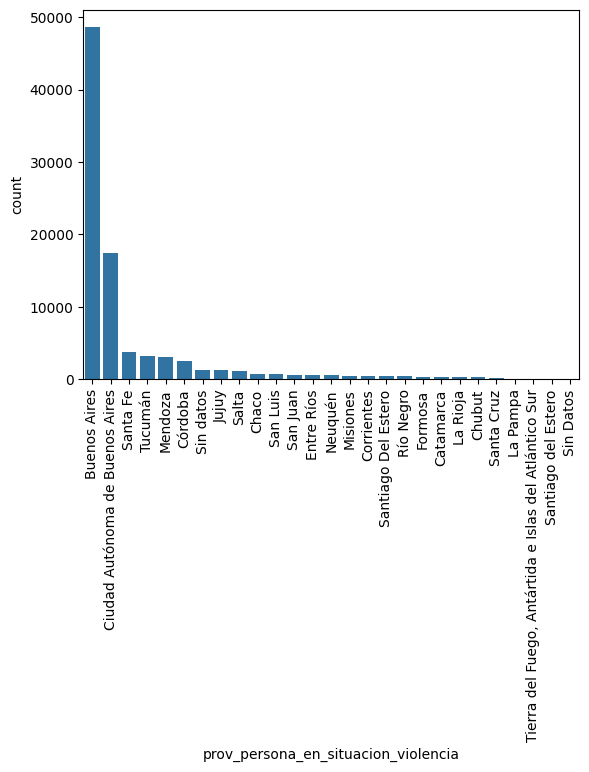

In [ ]:
 sns.countplot(x='prov_persona_en_situacion_violencia', data=Linea144, order=Linea144['prov_persona_en_situacion_violencia'].value_counts().index)
 plt.xticks(rotation=90)
 plt.show()
 #resta ver como relativizar este valor por medio de la población de cada provincia


In [ ]:
#Valores únicos de provincias
Linea144['prov_persona_en_situacion_violencia'].unique()
#Repite Santiago del Estero

array(['Buenos Aires', 'Entre Ríos', 'Mendoza', 'Tucumán', 'Santa Fe',
       'Misiones', 'San Luis', 'Córdoba', 'Jujuy', 'Río Negro',
       'San Juan', 'Salta', 'Santiago Del Estero',
       'Ciudad Autónoma de Buenos Aires', 'Chaco', 'Formosa', 'Neuquén',
       'Sin datos', 'Catamarca', 'Corrientes', 'La Rioja', 'La Pampa',
       'Chubut', 'Sin Datos', 'Santa Cruz',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santiago del Estero'], dtype=object)

In [ ]:
#Reemplazar "Santiago Del Estero" por "Santiago del Estero"
Linea144.replace('Santiago Del Estero', 'Santiago del Estero', inplace=True)
Linea144['prov_persona_en_situacion_violencia'].value_counts()

prov_persona_en_situacion_violencia
Buenos Aires                                             48565
Ciudad Autónoma de Buenos Aires                          17397
Santa Fe                                                  3785
Tucumán                                                   3224
Mendoza                                                   3132
Córdoba                                                   2610
Sin datos                                                 1286
Jujuy                                                     1252
Salta                                                     1232
Chaco                                                      801
San Luis                                                   733
San Juan                                                   654
Entre Ríos                                                 631
Neuquén                                                    613
Santiago del Estero                                        562
Misiones           

## Género

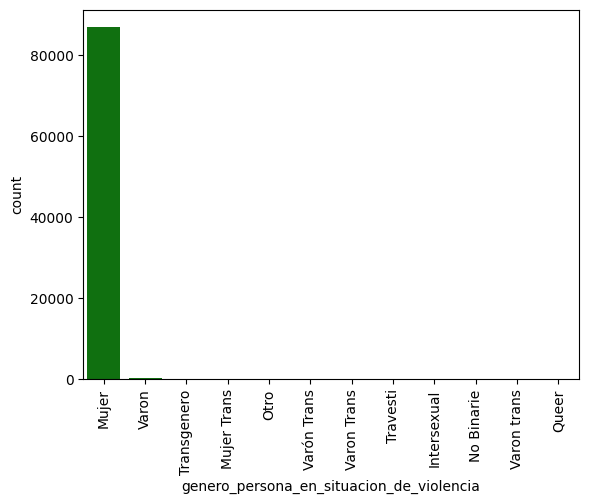

In [ ]:
sns.countplot(x='genero_persona_en_situacion_de_violencia', data=Linea144, order=Linea144['genero_persona_en_situacion_de_violencia'].value_counts().index, color='green')
plt.xticks(rotation=90)
plt.show()



## País de nacimiento

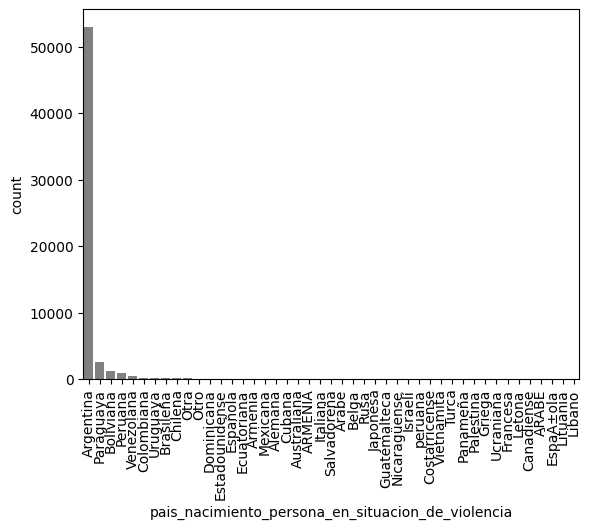

In [ ]:
sns.countplot(x='pais_nacimiento_persona_en_situacion_de_violencia', data=Linea144, order=Linea144['pais_nacimiento_persona_en_situacion_de_violencia'].value_counts().index, color='grey')
plt.xticks(rotation=90)
plt.show()

## Vinculo

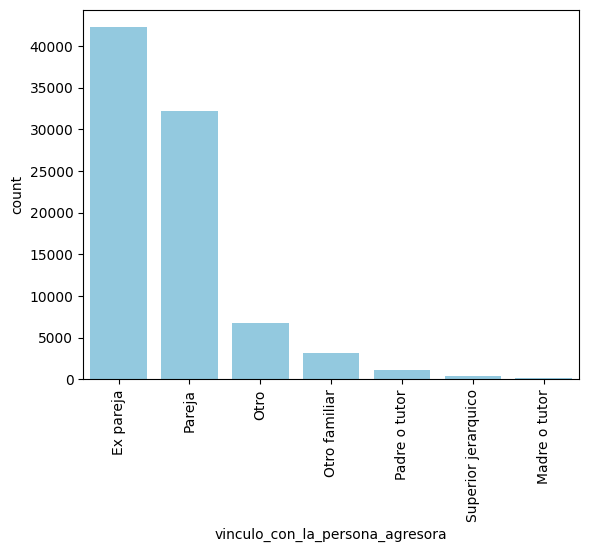

In [ ]:
#Graficos:
sns.countplot(x='vinculo_con_la_persona_agresora', data=Linea144, order=Linea144['vinculo_con_la_persona_agresora'].value_counts().index, color='skyblue')
plt.xticks(rotation=90)
plt.show()

## Género del agresor

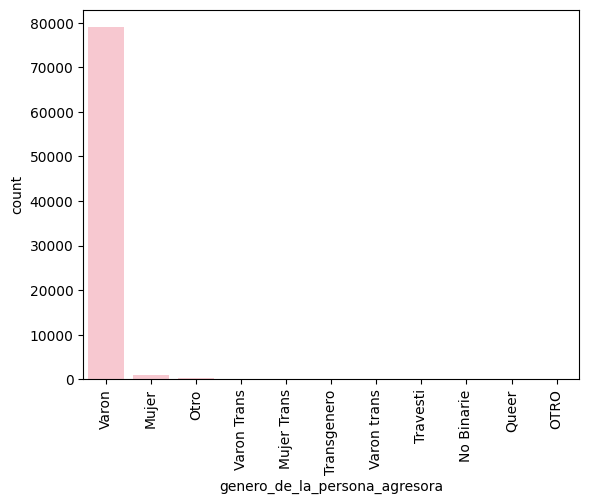

In [ ]:
sns.countplot(x='genero_de_la_persona_agresora', data=Linea144, order=Linea144['genero_de_la_persona_agresora'].value_counts().index, color='pink')
plt.xticks(rotation=90)
plt.show()

# Outliers de la variable edad

***#Descripción de la columna numérica edad***


In [ ]:
Linea144['edad_persona_en_situacion_de_violencia'].describe()
#Vemos que el mínimo es 1 y le máximo es 127 por lo cual deberíamos limpiar los outliers para la variable

count    72262.000000
mean        35.688079
std         12.597016
min          1.000000
25%         27.000000
50%         34.000000
75%         42.000000
max        127.000000
Name: edad_persona_en_situacion_de_violencia, dtype: float64

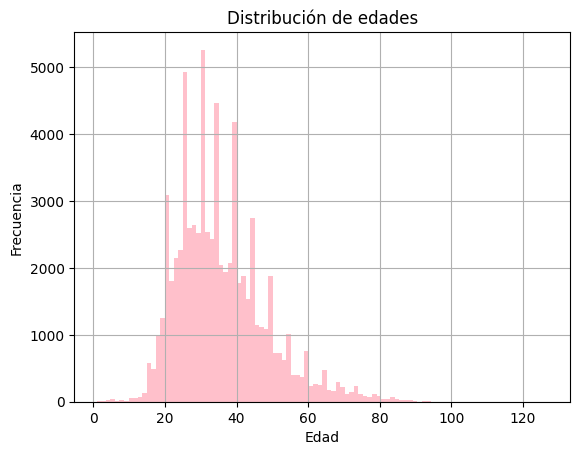

In [ ]:
#Ver la distribución de edades
Linea144['edad_persona_en_situacion_de_violencia'].hist(bins=100, color='pink')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

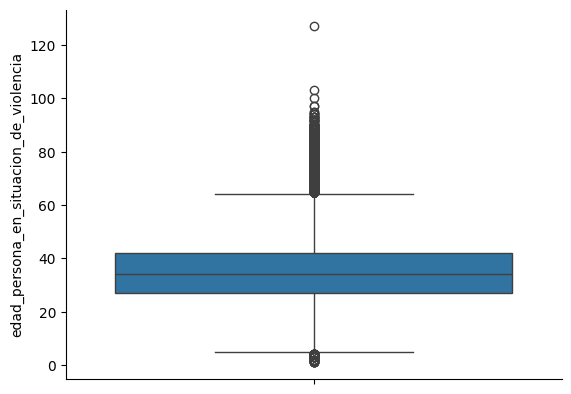

In [ ]:
#Usamos un diagrama de caja para visualizar los outliers en la columna de edad
sns.boxplot(Linea144['edad_persona_en_situacion_de_violencia'])
sns.despine()

## Rango intercuartílico

In [ ]:
#Calculamos el rango intercuartílico para la edad
q1 = Linea144['edad_persona_en_situacion_de_violencia'].quantile(0.25)
q3 = Linea144['edad_persona_en_situacion_de_violencia'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)
print(lb, ub)

4.5 64.5


In [ ]:
#Eliminamos outliers
Linea144 = Linea144[(Linea144['edad_persona_en_situacion_de_violencia'] > lb) & (Linea144['edad_persona_en_situacion_de_violencia'] < ub)]
Linea144.reset_index(drop=True, inplace=True)

## Diagrama de caja

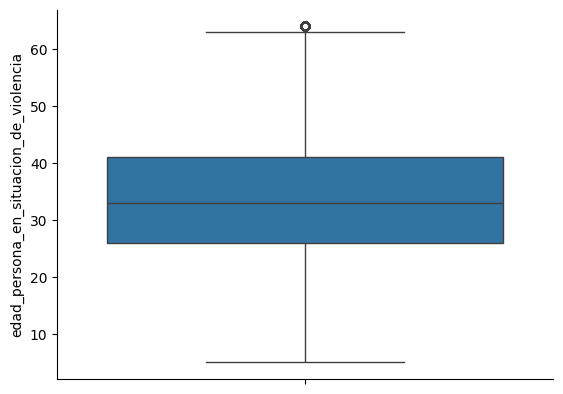

In [ ]:
#Gráfico de edad sin outliers
sns.boxplot(Linea144['edad_persona_en_situacion_de_violencia'])
sns.despine()

## Gráfico de distribución

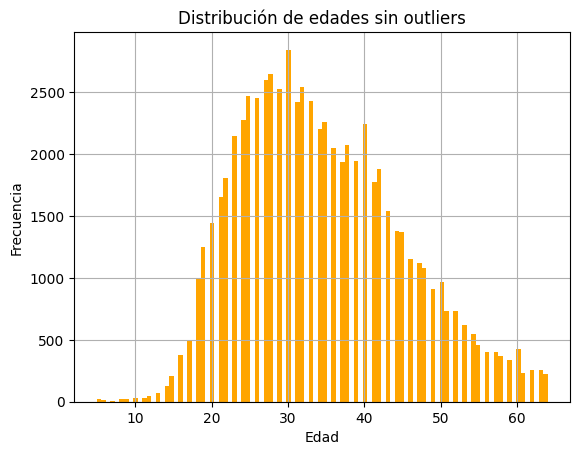

In [ ]:
#Ver la distribución de edades sin outliers
Linea144['edad_persona_en_situacion_de_violencia'].hist(bins=100, color='orange')
plt.title('Distribución de edades sin outliers')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Reemplazo de datos faltantes

## País de nacimiento

In [ ]:
Linea144.isna().sum()

Anio                                                     0
Fecha                                                    0
prov_persona_en_situacion_violencia                      0
genero_persona_en_situacion_de_violencia               817
edad_persona_en_situacion_de_violencia                   0
pais_nacimiento_persona_en_situacion_de_violencia    18489
tipo_de_violencia_fisica                                 0
tipo_de_violencia_psicologica                            0
tipo_de_violencia_sexual                                 0
tipo_de_violencia_economica_y_patrimonial                0
tipo_de_violencia_simbolica                              0
tipo_de_violencia_domestica                              0
modalidad_de_violencia_institucional                     0
modalidad_de_violencia_laboral                           0
modalidad_violencia_contra_libertad_reproductiva         0
modalidad_de_violencia_obstetrica                        0
modalidad_de_violencia_mediatica                        

In [ ]:
#Reemplazo en país de nacimiento, la variable con mas datos faltantes
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
Linea144_imputados = imputer.fit_transform(Linea144[['pais_nacimiento_persona_en_situacion_de_violencia']])
np.shape(Linea144_imputados)

(69837, 1)

In [ ]:
Linea144_imputados[:10]

array([['Argentina'],
       ['Argentina'],
       ['Argentina'],
       ['Argentina'],
       ['Paraguaya'],
       ['Argentina'],
       ['Argentina'],
       ['Argentina'],
       ['Argentina'],
       ['Argentina']], dtype=object)

In [ ]:
Linea144['pais_nacimiento_persona_en_situacion_de_violencia'] = Linea144_imputados.reshape(-1)

In [ ]:
#Reviso como quedó luego del reemplazo
Linea144.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia              817
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

## Género del agresor

In [ ]:
#Aplico valor mas frecuente en género a la segunda variable con más datos faltantes
Linea144_imputados2 = imputer.fit_transform(Linea144[['genero_de_la_persona_agresora']])
np.shape(Linea144_imputados2)

(69837, 1)

In [ ]:
Linea144_imputados2[:10]

array([['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon'],
       ['Varon']], dtype=object)

In [ ]:
Linea144['genero_de_la_persona_agresora'] = Linea144_imputados2.reshape(-1)

In [ ]:
Linea144.head() #reviso como ha quedado

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,1426426
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,2014533
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Si,Si,No,Si,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


In [ ]:
#Reviso como quedó luego del reemplazo
Linea144.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia              817
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

## Género de la víctima

In [ ]:
#Reemplazo valores nulos de genero_persona_en_situacion_de_violencia por el valor más frecuente
Linea144_imputados3 = imputer.fit_transform(Linea144[['genero_persona_en_situacion_de_violencia']])

In [ ]:
Linea144['genero_persona_en_situacion_de_violencia'] = Linea144_imputados3.reshape(-1)
#se agrega el reshape (-1) ya que tiraba error

In [ ]:
np.shape(Linea144_imputados3)

(69837, 1)

In [ ]:
Linea144_imputados3[:10]

array([['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer'],
       ['Mujer']], dtype=object)

In [ ]:
#Reviso como quedó luego del reemplazo
Linea144.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia                0
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

## Población de la provincia

In [ ]:
#Ver que datos faltan en población_provincia
Linea144[Linea144['poblacion_provincia'].isnull()]

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
221,2023,1/5/2023,Sin datos,Mujer,40.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
338,2023,1/7/2023,Sin datos,Mujer,56.0,Argentina,Si,No,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
420,2023,1/9/2023,Sin datos,Mujer,7.0,Argentina,No,No,Si,No,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
473,2023,1/10/2023,Sin datos,Mujer,40.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
525,2023,1/11/2023,Sin datos,Mujer,48.0,Argentina,No,Si,Si,No,...,No,No,Si,No,No,No,No,Otro,Varon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67719,2020,11/24/2020,Sin datos,Mujer,24.0,Peruana,No,Si,No,Si,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
67766,2020,11/25/2020,Sin datos,Mujer,38.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
67770,2020,11/25/2020,Sin datos,Mujer,29.0,Argentina,No,Si,Si,No,...,No,No,No,No,No,No,Si,Otro,Mujer,NaN
67861,2020,11/27/2020,Sin datos,Mujer,43.0,Peruana,No,No,Si,No,...,No,No,No,No,No,No,Si,Otro,Varon,NaN


In [ ]:
#Reemplazar "Sin Datos" por NaN
Linea144.replace('Sin Datos', np.nan, inplace=True)
Linea144[Linea144['poblacion_provincia'].isnull()]

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
221,2023,1/5/2023,Sin datos,Mujer,40.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
338,2023,1/7/2023,Sin datos,Mujer,56.0,Argentina,Si,No,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
420,2023,1/9/2023,Sin datos,Mujer,7.0,Argentina,No,No,Si,No,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
473,2023,1/10/2023,Sin datos,Mujer,40.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
525,2023,1/11/2023,Sin datos,Mujer,48.0,Argentina,No,Si,Si,No,...,No,No,Si,No,No,No,No,Otro,Varon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67719,2020,11/24/2020,Sin datos,Mujer,24.0,Peruana,No,Si,No,Si,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
67766,2020,11/25/2020,Sin datos,Mujer,38.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
67770,2020,11/25/2020,Sin datos,Mujer,29.0,Argentina,No,Si,Si,No,...,No,No,No,No,No,No,Si,Otro,Mujer,NaN
67861,2020,11/27/2020,Sin datos,Mujer,43.0,Peruana,No,No,Si,No,...,No,No,No,No,No,No,Si,Otro,Varon,NaN


In [ ]:
#Reemplazar "Sin datos" por NaN
Linea144.replace('Sin datos', np.nan, inplace=True)
Linea144[Linea144['poblacion_provincia'].isnull()]

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
221,2023,1/5/2023,NaN,Mujer,40.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
338,2023,1/7/2023,NaN,Mujer,56.0,Argentina,Si,No,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
420,2023,1/9/2023,NaN,Mujer,7.0,Argentina,No,No,Si,No,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
473,2023,1/10/2023,NaN,Mujer,40.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
525,2023,1/11/2023,NaN,Mujer,48.0,Argentina,No,Si,Si,No,...,No,No,Si,No,No,No,No,Otro,Varon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67719,2020,11/24/2020,NaN,Mujer,24.0,Peruana,No,Si,No,Si,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
67766,2020,11/25/2020,NaN,Mujer,38.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
67770,2020,11/25/2020,NaN,Mujer,29.0,Argentina,No,Si,Si,No,...,No,No,No,No,No,No,Si,Otro,Mujer,NaN
67861,2020,11/27/2020,NaN,Mujer,43.0,Peruana,No,No,Si,No,...,No,No,No,No,No,No,Si,Otro,Varon,NaN


In [ ]:
Linea144.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                   524
genero_persona_en_situacion_de_violencia                0
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

## Provincia de la víctima

In [ ]:
#Reemplazo por valor mas frecuente en prov_persona_en_situacion_violencia
Linea144_imputados4 = imputer.fit_transform(Linea144[['prov_persona_en_situacion_violencia']])
np.shape(Linea144_imputados4)

(69837, 1)

In [ ]:
Linea144_imputados4[:10]

array([['Buenos Aires'],
       ['Buenos Aires'],
       ['Entre Ríos'],
       ['Mendoza'],
       ['Buenos Aires'],
       ['Buenos Aires'],
       ['Santa Fe'],
       ['Mendoza'],
       ['Misiones'],
       ['Santa Fe']], dtype=object)

In [ ]:
Linea144['prov_persona_en_situacion_violencia'] = Linea144_imputados4.reshape(-1)
Linea144.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia                0
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

In [ ]:
Linea144[Linea144['prov_persona_en_situacion_violencia'] == 'Buenos Aires']

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,No,No,No,Otro,Varon,17569053
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Si,Si,No,Si,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
5,2023,1/1/2023,Buenos Aires,Mujer,57.0,Argentina,Si,Si,No,Si,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
10,2023,1/1/2023,Buenos Aires,Mujer,26.0,Argentina,Si,Si,No,Si,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,Buenos Aires,Mujer,30.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,17569053
69833,2020,12/31/2020,Buenos Aires,Mujer,40.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Otro familiar,Otro,17569053
69834,2020,12/31/2020,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053
69835,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,17569053


In [ ]:
#Ver en que filas faltan datos de población provincia
Linea144[Linea144['poblacion_provincia'].isnull()]


,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia
221,2023,1/5/2023,Buenos Aires,Mujer,40.0,Argentina,No,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
338,2023,1/7/2023,Buenos Aires,Mujer,56.0,Argentina,Si,No,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
420,2023,1/9/2023,Buenos Aires,Mujer,7.0,Argentina,No,No,Si,No,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
473,2023,1/10/2023,Buenos Aires,Mujer,40.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
525,2023,1/11/2023,Buenos Aires,Mujer,48.0,Argentina,No,Si,Si,No,...,No,No,Si,No,No,No,No,Otro,Varon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67719,2020,11/24/2020,Buenos Aires,Mujer,24.0,Peruana,No,Si,No,Si,...,Si,No,No,No,No,No,No,NaN,Varon,NaN
67766,2020,11/25/2020,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,...,Si,No,No,No,No,No,No,Pareja,Varon,NaN
67770,2020,11/25/2020,Buenos Aires,Mujer,29.0,Argentina,No,Si,Si,No,...,No,No,No,No,No,No,Si,Otro,Mujer,NaN
67861,2020,11/27/2020,Buenos Aires,Mujer,43.0,Peruana,No,No,Si,No,...,No,No,No,No,No,No,Si,Otro,Varon,NaN


In [ ]:
#Reemplazo NaN por los datos de la población provincial en columna poblacion_provincia
Linea144.loc[Linea144['prov_persona_en_situacion_violencia'] == 'Buenos Aires', 'poblacion_provincia'] = 17569053

In [ ]:
#Veo como quedó
Linea144.isna().sum()

Anio                                                    0
Fecha                                                   0
prov_persona_en_situacion_violencia                     0
genero_persona_en_situacion_de_violencia                0
edad_persona_en_situacion_de_violencia                  0
pais_nacimiento_persona_en_situacion_de_violencia       0
tipo_de_violencia_fisica                                0
tipo_de_violencia_psicologica                           0
tipo_de_violencia_sexual                                0
tipo_de_violencia_economica_y_patrimonial               0
tipo_de_violencia_simbolica                             0
tipo_de_violencia_domestica                             0
modalidad_de_violencia_institucional                    0
modalidad_de_violencia_laboral                          0
modalidad_violencia_contra_libertad_reproductiva        0
modalidad_de_violencia_obstetrica                       0
modalidad_de_violencia_mediatica                        0
modalidad_de_v

# Datos eliminados

In [ ]:
#Finalmente elimino las filas sin dato de "vinculo_con_la_persona_agresora"
Linea144.dropna(subset=['vinculo_con_la_persona_agresora'], inplace=True)

In [ ]:
Linea144.isna().sum()

Anio                                                 0
Fecha                                                0
prov_persona_en_situacion_violencia                  0
genero_persona_en_situacion_de_violencia             0
edad_persona_en_situacion_de_violencia               0
pais_nacimiento_persona_en_situacion_de_violencia    0
tipo_de_violencia_fisica                             0
tipo_de_violencia_psicologica                        0
tipo_de_violencia_sexual                             0
tipo_de_violencia_economica_y_patrimonial            0
tipo_de_violencia_simbolica                          0
tipo_de_violencia_domestica                          0
modalidad_de_violencia_institucional                 0
modalidad_de_violencia_laboral                       0
modalidad_violencia_contra_libertad_reproductiva     0
modalidad_de_violencia_obstetrica                    0
modalidad_de_violencia_mediatica                     0
modalidad_de_violencia_otras                         0
vinculo_co

In [ ]:
Linea144.shape

(68270, 21)

# Modificar variables categóricas

## Tipo de violencia

In [ ]:
#Vemos como se divide la columna
Linea144_dummies = pd.get_dummies(Linea144, columns=["modalidad_de_violencia_institucional"])
Linea144_dummies.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,modalidad_de_violencia_institucional_No,modalidad_de_violencia_institucional_SI,modalidad_de_violencia_institucional_Si
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Si,Si,Si,No,...,No,No,No,No,Otro,Varon,17569053,True,False,False
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Si,Si,No,No,...,No,No,No,No,Pareja,Varon,17569053,True,False,False
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,No,Si,No,No,...,No,No,No,No,Pareja,Varon,1426426,True,False,False
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,No,Si,No,No,...,No,No,No,No,Ex pareja,Varon,2014533,True,False,False
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Si,Si,No,Si,...,No,No,No,No,Ex pareja,Varon,17569053,True,False,False


In [ ]:
#Tenemos distintos formatos de respuesta, por tanto antes de usar dummies debemos homogeneizar los "SI" y "Si"
Linea144.replace('Si', 'SI', inplace=True)
Linea144.replace('No', 'NO', inplace=True)

In [ ]:
Linea144_dummies = pd.get_dummies(Linea144, columns=["modalidad_de_violencia_institucional"])
Linea144_dummies.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,modalidad_de_violencia_institucional_NO,modalidad_de_violencia_institucional_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,SI,SI,SI,NO,...,NO,NO,NO,NO,NO,Otro,Varon,17569053,True,False
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,SI,NO,NO,...,NO,NO,NO,NO,NO,Pareja,Varon,17569053,True,False
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,SI,NO,NO,...,NO,NO,NO,NO,NO,Pareja,Varon,1426426,True,False
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,SI,NO,NO,...,NO,NO,NO,NO,NO,Ex pareja,Varon,2014533,True,False
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,SI,NO,SI,...,NO,NO,NO,NO,NO,Ex pareja,Varon,17569053,True,False


In [ ]:
Linea144['tipo_de_violencia_fisica'].value_counts()

tipo_de_violencia_fisica
SI    46691
NO    21579
Name: count, dtype: int64

### Física

Como este tipo de modificación no sirve al objetivo del proyecto probaremos reemplazar los "SI" por 1

In [ ]:
Linea144[['violencia_fisica_NO', 'violencia_fisica_SI']] = pd.get_dummies(Linea144["tipo_de_violencia_fisica"], dtype = int)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,...,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,SI,SI,SI,NO,...,NO,NO,NO,NO,NO,Otro,Varon,17569053,0,1
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,SI,NO,NO,...,NO,NO,NO,NO,NO,Pareja,Varon,17569053,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,SI,NO,NO,...,NO,NO,NO,NO,NO,Pareja,Varon,1426426,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,SI,NO,NO,...,NO,NO,NO,NO,NO,Ex pareja,Varon,2014533,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,SI,NO,SI,...,NO,NO,NO,NO,NO,Ex pareja,Varon,17569053,0,1


In [ ]:
Linea144.drop(columns='tipo_de_violencia_fisica',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,...,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,SI,SI,NO,NO,...,NO,NO,NO,NO,NO,Otro,Varon,17569053,0,1
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,NO,NO,SI,...,NO,NO,NO,NO,NO,Pareja,Varon,17569053,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,SI,NO,NO,SI,...,NO,NO,NO,NO,NO,Pareja,Varon,1426426,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,SI,NO,NO,NO,...,NO,NO,NO,NO,NO,Ex pareja,Varon,2014533,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,NO,SI,NO,...,NO,NO,NO,NO,NO,Ex pareja,Varon,17569053,0,1


### Psicológica

In [ ]:
Linea144['tipo_de_violencia_psicologica'].value_counts()

tipo_de_violencia_psicologica
SI    65661
NO     2609
Name: count, dtype: int64

In [ ]:
Linea144[['violencia_psicologica_NO', 'violencia_psicologica_SI']] = pd.get_dummies(Linea144["tipo_de_violencia_psicologica"], dtype = int)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,...,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,SI,SI,NO,NO,...,NO,NO,NO,Otro,Varon,17569053,0,1,0,1
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,NO,NO,SI,...,NO,NO,NO,Pareja,Varon,17569053,0,1,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,SI,NO,NO,SI,...,NO,NO,NO,Pareja,Varon,1426426,1,0,0,1
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,SI,NO,NO,NO,...,NO,NO,NO,Ex pareja,Varon,2014533,1,0,0,1
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,NO,SI,NO,...,NO,NO,NO,Ex pareja,Varon,17569053,0,1,0,1


In [ ]:
Linea144.drop(columns='tipo_de_violencia_psicologica',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,...,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,SI,NO,NO,NO,...,NO,NO,NO,Otro,Varon,17569053,0,1,0,1
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,SI,SI,...,NO,NO,NO,Pareja,Varon,17569053,0,1,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,SI,SI,...,NO,NO,NO,Pareja,Varon,1426426,1,0,0,1
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,NO,SI,...,NO,NO,NO,Ex pareja,Varon,2014533,1,0,0,1
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,SI,NO,SI,...,NO,NO,NO,Ex pareja,Varon,17569053,0,1,0,1


### Sexual

In [ ]:
Linea144['tipo_de_violencia_sexual'].value_counts()

tipo_de_violencia_sexual
NO    57898
SI    10372
Name: count, dtype: int64

In [ ]:
Linea144[['violencia_sexual_NO', 'violencia_sexual_SI']] = pd.get_dummies(Linea144["tipo_de_violencia_sexual"], dtype = int)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,...,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,SI,NO,NO,NO,...,NO,Otro,Varon,17569053,0,1,0,1,0,1
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,SI,SI,...,NO,Pareja,Varon,17569053,0,1,0,1,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,SI,SI,...,NO,Pareja,Varon,1426426,1,0,0,1,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,NO,SI,...,NO,Ex pareja,Varon,2014533,1,0,0,1,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,SI,NO,SI,...,NO,Ex pareja,Varon,17569053,0,1,0,1,1,0


In [ ]:
Linea144.drop(columns='tipo_de_violencia_sexual',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,...,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,NO,Otro,Varon,17569053,0,1,0,1,0,1
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,SI,SI,NO,...,NO,Pareja,Varon,17569053,0,1,0,1,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,SI,SI,NO,...,NO,Pareja,Varon,1426426,1,0,0,1,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,SI,NO,...,NO,Ex pareja,Varon,2014533,1,0,0,1,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,NO,SI,NO,...,NO,Ex pareja,Varon,17569053,0,1,0,1,1,0


### Económica y patrimonial

In [ ]:
Linea144['tipo_de_violencia_economica_y_patrimonial'].value_counts()

tipo_de_violencia_economica_y_patrimonial
NO    39046
SI    29224
Name: count, dtype: int64

In [ ]:
Linea144[['violencia_economica_y_patrimonial_NO', 'violencia_economica_y_patrimonial_SI']] = pd.get_dummies(Linea144["tipo_de_violencia_economica_y_patrimonial"], dtype = int)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,...,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,Varon,17569053,0,1,0,1,0,1,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,SI,SI,NO,...,Varon,17569053,0,1,0,1,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,SI,SI,NO,...,Varon,1426426,1,0,0,1,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,SI,NO,...,Varon,2014533,1,0,0,1,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,NO,SI,NO,...,Varon,17569053,0,1,0,1,1,0,0,1


In [ ]:
Linea144.drop(columns='tipo_de_violencia_economica_y_patrimonial',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,...,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,Varon,17569053,0,1,0,1,0,1,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,SI,NO,NO,...,Varon,17569053,0,1,0,1,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,SI,SI,NO,NO,...,Varon,1426426,1,0,0,1,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,SI,NO,NO,...,Varon,2014533,1,0,0,1,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,SI,NO,NO,...,Varon,17569053,0,1,0,1,1,0,0,1


### Simbólica

In [ ]:
Linea144['tipo_de_violencia_simbolica'].value_counts()

tipo_de_violencia_simbolica
NO    43898
SI    24372
Name: count, dtype: int64

In [ ]:
Linea144[['violencia_simbolica_NO', 'violencia_simbolica_SI']] = pd.get_dummies(Linea144["tipo_de_violencia_simbolica"], dtype = int)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,...,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI,violencia_simbolica_NO,violencia_simbolica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,0,1,0,1,0,1,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,SI,NO,NO,...,0,1,0,1,1,0,1,0,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,SI,SI,NO,NO,...,1,0,0,1,1,0,1,0,0,1
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,SI,NO,NO,...,1,0,0,1,1,0,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,SI,NO,NO,...,0,1,0,1,1,0,0,1,1,0


In [ ]:
Linea144.drop(columns='tipo_de_violencia_simbolica',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,...,violencia_fisica_NO,violencia_fisica_SI,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI,violencia_simbolica_NO,violencia_simbolica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,0,1,0,1,0,1,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,NO,NO,NO,...,0,1,0,1,1,0,1,0,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,SI,NO,NO,NO,...,1,0,0,1,1,0,1,0,0,1
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,SI,NO,NO,NO,...,1,0,0,1,1,0,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,NO,NO,NO,...,0,1,0,1,1,0,0,1,1,0


### Doméstica

In [ ]:
Linea144['tipo_de_violencia_domestica'].value_counts()

tipo_de_violencia_domestica
SI    63161
NO     5109
Name: count, dtype: int64

In [ ]:
Linea144[['violencia_domestica_NO', 'violencia_domestica_SI']] = pd.get_dummies(Linea144["tipo_de_violencia_domestica"], dtype = int)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,...,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI,violencia_simbolica_NO,violencia_simbolica_SI,violencia_domestica_NO,violencia_domestica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,0,1,0,1,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,SI,NO,NO,NO,...,0,1,1,0,1,0,0,1,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,SI,NO,NO,NO,...,0,1,1,0,1,0,0,1,0,1
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,SI,NO,NO,NO,...,0,1,1,0,1,0,1,0,0,1
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,SI,NO,NO,NO,...,0,1,1,0,0,1,1,0,0,1


In [ ]:
Linea144.drop(columns='tipo_de_violencia_domestica',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,...,violencia_psicologica_NO,violencia_psicologica_SI,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI,violencia_simbolica_NO,violencia_simbolica_SI,violencia_domestica_NO,violencia_domestica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,0,1,0,1,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,NO,NO,...,0,1,1,0,1,0,0,1,0,1
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,NO,NO,...,0,1,1,0,1,0,0,1,0,1
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,NO,NO,...,0,1,1,0,1,0,1,0,0,1
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,NO,NO,NO,...,0,1,1,0,0,1,1,0,0,1


## Modalidad de violencia

### Institucional

In [ ]:
Linea144[['violencia_institucional_NO', 'violencia_institucional_SI']] = pd.get_dummies(Linea144["modalidad_de_violencia_institucional"], dtype = int)
Linea144.drop(columns='modalidad_de_violencia_institucional',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,...,violencia_sexual_NO,violencia_sexual_SI,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI,violencia_simbolica_NO,violencia_simbolica_SI,violencia_domestica_NO,violencia_domestica_SI,violencia_institucional_NO,violencia_institucional_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,0,1,1,0,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,NO,NO,...,1,0,1,0,0,1,0,1,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,NO,NO,...,1,0,1,0,0,1,0,1,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,NO,NO,...,1,0,1,0,1,0,0,1,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,NO,NO,NO,...,1,0,0,1,1,0,0,1,1,0


### Laboral

In [ ]:
Linea144[['violencia_laboral_NO', 'violencia_laboral_SI']] = pd.get_dummies(Linea144["modalidad_de_violencia_laboral"], dtype = int)
Linea144.drop(columns='modalidad_de_violencia_laboral',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,...,violencia_economica_y_patrimonial_NO,violencia_economica_y_patrimonial_SI,violencia_simbolica_NO,violencia_simbolica_SI,violencia_domestica_NO,violencia_domestica_SI,violencia_institucional_NO,violencia_institucional_SI,violencia_laboral_NO,violencia_laboral_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,NO,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,NO,NO,...,1,0,0,1,0,1,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,NO,NO,...,1,0,0,1,0,1,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,NO,NO,...,1,0,1,0,0,1,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,NO,NO,NO,...,0,1,1,0,0,1,1,0,1,0


### Contra libertad reproductiva

In [ ]:
Linea144[['violencia_reproductiva_NO', 'violencia_reproductiva_SI']] = pd.get_dummies(Linea144["modalidad_violencia_contra_libertad_reproductiva"], dtype = int)
Linea144.drop(columns='modalidad_violencia_contra_libertad_reproductiva',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,...,violencia_simbolica_NO,violencia_simbolica_SI,violencia_domestica_NO,violencia_domestica_SI,violencia_institucional_NO,violencia_institucional_SI,violencia_laboral_NO,violencia_laboral_SI,violencia_reproductiva_NO,violencia_reproductiva_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,NO,Otro,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,NO,Pareja,...,0,1,0,1,1,0,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,NO,Pareja,...,0,1,0,1,1,0,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,NO,Ex pareja,...,1,0,0,1,1,0,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,NO,NO,Ex pareja,...,1,0,0,1,1,0,1,0,1,0


### Obstétrica

In [ ]:
Linea144[['violencia_obstetrica_NO', 'violencia_obstetrica_SI']] = pd.get_dummies(Linea144["modalidad_de_violencia_obstetrica"], dtype = int)
Linea144.drop(columns='modalidad_de_violencia_obstetrica',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,...,violencia_domestica_NO,violencia_domestica_SI,violencia_institucional_NO,violencia_institucional_SI,violencia_laboral_NO,violencia_laboral_SI,violencia_reproductiva_NO,violencia_reproductiva_SI,violencia_obstetrica_NO,violencia_obstetrica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,NO,Otro,Varon,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,NO,Pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,NO,Pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,NO,Ex pareja,Varon,...,0,1,1,0,1,0,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,NO,Ex pareja,Varon,...,0,1,1,0,1,0,1,0,1,0


### Mediática

In [ ]:
Linea144[['violencia_mediatica_NO', 'violencia_mediatica_SI']] = pd.get_dummies(Linea144["modalidad_de_violencia_mediatica"], dtype = int)
Linea144.drop(columns='modalidad_de_violencia_mediatica',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,...,violencia_institucional_NO,violencia_institucional_SI,violencia_laboral_NO,violencia_laboral_SI,violencia_reproductiva_NO,violencia_reproductiva_SI,violencia_obstetrica_NO,violencia_obstetrica_SI,violencia_mediatica_NO,violencia_mediatica_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,NO,Otro,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,NO,Pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,NO,Pareja,Varon,1426426,...,1,0,1,0,1,0,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,NO,Ex pareja,Varon,2014533,...,1,0,1,0,1,0,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,NO,Ex pareja,Varon,17569053,...,1,0,1,0,1,0,1,0,1,0


### Otras

In [ ]:
Linea144[['violencia_otras_NO', 'violencia_otras_SI']] = pd.get_dummies(Linea144["modalidad_de_violencia_otras"], dtype = int)
Linea144.drop(columns='modalidad_de_violencia_otras',axis=1,inplace=True)
Linea144.head()

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,...,violencia_laboral_NO,violencia_laboral_SI,violencia_reproductiva_NO,violencia_reproductiva_SI,violencia_obstetrica_NO,violencia_obstetrica_SI,violencia_mediatica_NO,violencia_mediatica_SI,violencia_otras_NO,violencia_otras_SI
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Otro,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,Pareja,Varon,1426426,1,...,1,0,1,0,1,0,1,0,1,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,Ex pareja,Varon,2014533,1,...,1,0,1,0,1,0,1,0,1,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,1,0


# Nuevas variables

## Tipo de violencia: %

In [ ]:
tipos_violencia_SI = pd.DataFrame(Linea144[['violencia_fisica_SI', 'violencia_psicologica_SI', 'violencia_sexual_SI', 'violencia_economica_y_patrimonial_SI', 'violencia_simbolica_SI', 'violencia_domestica_SI']]).sum()



In [ ]:
tipos_violencia_SI

violencia_fisica_SI                     46691
violencia_psicologica_SI                65661
violencia_sexual_SI                     10372
violencia_economica_y_patrimonial_SI    29224
violencia_simbolica_SI                  24372
violencia_domestica_SI                  63161
dtype: int64

In [ ]:
tipos_violencia_NO = pd.DataFrame(Linea144[['violencia_fisica_NO', 'violencia_psicologica_NO', 'violencia_sexual_NO', 'violencia_economica_y_patrimonial_NO', 'violencia_simbolica_NO', 'violencia_domestica_NO']]).sum()
tipos_violencia_NO


violencia_fisica_NO                     21579
violencia_psicologica_NO                 2609
violencia_sexual_NO                     57898
violencia_economica_y_patrimonial_NO    39046
violencia_simbolica_NO                  43898
violencia_domestica_NO                   5109
dtype: int64

In [ ]:
violencia_fisica = pd.DataFrame(Linea144[['violencia_fisica_SI', 'violencia_fisica_NO']]).sum()
violencia_fisica['violencia_fisica_SI']/violencia_fisica.sum()*100

68.39168009374542

In [ ]:
violencia_psicologica = pd.DataFrame(Linea144[['violencia_psicologica_SI', 'violencia_psicologica_NO']]).sum()
violencia_psicologica['violencia_psicologica_SI']/violencia_psicologica.sum()*100

96.17840925736047

In [ ]:
violencia_sexual = pd.DataFrame(Linea144[['violencia_sexual_SI', 'violencia_sexual_NO']]).sum()
violencia_sexual['violencia_sexual_SI']/violencia_sexual.sum()*100

15.19261754797129

In [ ]:
violencia_economica_y_patrimonial = pd.DataFrame(Linea144[['violencia_economica_y_patrimonial_SI', 'violencia_economica_y_patrimonial_NO']]).sum()
violencia_economica_y_patrimonial['violencia_economica_y_patrimonial_SI']/violencia_economica_y_patrimonial.sum()*100

42.80650358869196

In [ ]:
violencia_simbolica = pd.DataFrame(Linea144[['violencia_simbolica_SI', 'violencia_simbolica_NO']]).sum()
violencia_simbolica['violencia_simbolica_SI']/violencia_simbolica.sum()*100

35.69942873883111

In [ ]:
violencia_domestica = pd.DataFrame(Linea144[['violencia_domestica_SI', 'violencia_domestica_NO']]).sum()
violencia_domestica['violencia_domestica_SI']/violencia_domestica.sum()*100

92.51647868756409

In [ ]:
#Ver como meter los % en una tabla

## Tipo de violencia: sumatoria por filas

In [ ]:
Linea144['suma_tipo_violencia'] = Linea144[['violencia_fisica_SI', 'violencia_psicologica_SI', 'violencia_sexual_SI', 'violencia_economica_y_patrimonial_SI', 'violencia_simbolica_SI', 'violencia_domestica_SI']].sum(axis=1)
Linea144

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,...,violencia_laboral_SI,violencia_reproductiva_NO,violencia_reproductiva_SI,violencia_obstetrica_NO,violencia_obstetrica_SI,violencia_mediatica_NO,violencia_mediatica_SI,violencia_otras_NO,violencia_otras_SI,suma_tipo_violencia
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Otro,Varon,17569053,0,...,0,1,0,1,0,1,0,1,0,3
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Pareja,Varon,17569053,0,...,0,1,0,1,0,1,0,1,0,4
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,Pareja,Varon,1426426,1,...,0,1,0,1,0,1,0,1,0,3
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,Ex pareja,Varon,2014533,1,...,0,1,0,1,0,1,0,1,0,2
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Ex pareja,Varon,17569053,0,...,0,1,0,1,0,1,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,Buenos Aires,Mujer,30.0,Argentina,Pareja,Varon,17569053,0,...,0,1,0,1,0,1,0,1,0,4
69833,2020,12/31/2020,Buenos Aires,Mujer,40.0,Argentina,Otro familiar,Otro,17569053,0,...,0,1,0,1,0,1,0,1,0,4
69834,2020,12/31/2020,Buenos Aires,Mujer,22.0,Argentina,Ex pareja,Varon,17569053,0,...,0,1,0,1,0,1,0,1,0,4
69835,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Ex pareja,Varon,17569053,0,...,0,1,0,1,0,1,0,1,0,4


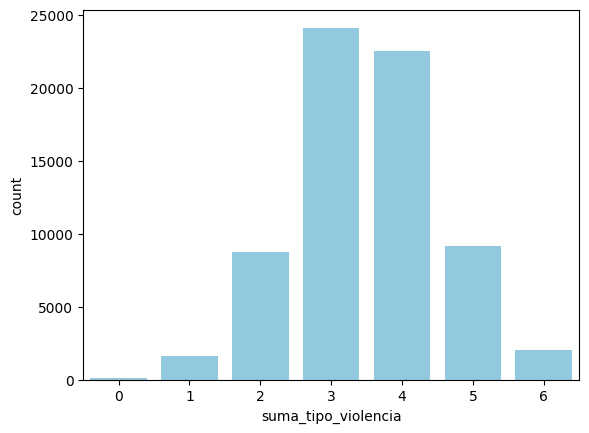

In [ ]:
#Visualizamos la columna suma de tipos de violencias
sns.countplot(x='suma_tipo_violencia', data=Linea144, color='skyblue')
plt.show()


## Modalidad de violencia: %

## Modalidad de violencia: sumatoria de modalidades

In [ ]:
modos_violencia_SI = pd.DataFrame(Linea144[['violencia_institucional_SI', 'violencia_laboral_SI', 'violencia_reproductiva_SI', 'violencia_obstetrica_SI', 'violencia_mediatica_SI', 'violencia_otras_SI']]).sum()
modos_violencia_SI

violencia_institucional_SI    1039
violencia_laboral_SI           883
violencia_reproductiva_SI      360
violencia_obstetrica_SI         58
violencia_mediatica_SI          34
violencia_otras_SI            1360
dtype: int64

In [ ]:
modos_violencia_NO = pd.DataFrame(Linea144[['violencia_institucional_NO', 'violencia_laboral_NO', 'violencia_reproductiva_NO', 'violencia_obstetrica_NO', 'violencia_mediatica_NO', 'violencia_otras_NO']]).sum()
modos_violencia_NO

violencia_institucional_NO    67231
violencia_laboral_NO          67387
violencia_reproductiva_NO     67910
violencia_obstetrica_NO       68212
violencia_mediatica_NO        68236
violencia_otras_NO            66910
dtype: int64

In [ ]:
violencia_institucional = pd.DataFrame(Linea144[['violencia_institucional_SI', 'violencia_institucional_NO']]).sum()
violencia_institucional['violencia_institucional_SI']/violencia_institucional.sum()*100

1.5218983448073824

In [ ]:
violencia_laboral = pd.DataFrame(Linea144[['violencia_laboral_SI', 'violencia_laboral_NO']]).sum()
violencia_laboral['violencia_laboral_SI']/violencia_laboral.sum()*100

1.2933938772520872

In [ ]:
violencia_reproductiva = pd.DataFrame(Linea144[['violencia_reproductiva_SI', 'violencia_reproductiva_NO']]).sum()
violencia_reproductiva['violencia_reproductiva_SI']/violencia_reproductiva.sum()*100

0.5273180020506811

In [ ]:
violencia_obstetrica = pd.DataFrame(Linea144[['violencia_obstetrica_SI', 'violencia_obstetrica_NO']]).sum()
violencia_obstetrica['violencia_obstetrica_SI']/violencia_obstetrica.sum()*100

0.08495678921927641

In [ ]:
violencia_mediatica = pd.DataFrame(Linea144[['violencia_mediatica_SI', 'violencia_mediatica_NO']]).sum()
violencia_mediatica['violencia_mediatica_SI']/violencia_mediatica.sum()*100

0.049802255749230986

In [ ]:
violencia_otras = pd.DataFrame(Linea144[['violencia_otras_SI', 'violencia_otras_NO']]).sum()
violencia_otras['violencia_otras_SI']/violencia_otras.sum()*100

1.9920902299692396

In [ ]:
#Ver como meter los % en una tabla

In [ ]:
Linea144['suma_modalidad_violencia'] = Linea144[["violencia_institucional_SI", "violencia_laboral_SI", "violencia_reproductiva_SI", "violencia_obstetrica_SI", "violencia_mediatica_SI", "violencia_otras_SI"]].sum(axis=1)
Linea144

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,...,violencia_reproductiva_NO,violencia_reproductiva_SI,violencia_obstetrica_NO,violencia_obstetrica_SI,violencia_mediatica_NO,violencia_mediatica_SI,violencia_otras_NO,violencia_otras_SI,suma_tipo_violencia,suma_modalidad_violencia
0,2023,1/1/2023,Buenos Aires,Mujer,19.0,Argentina,Otro,Varon,17569053,0,...,1,0,1,0,1,0,1,0,3,0
1,2023,1/1/2023,Buenos Aires,Mujer,46.0,Argentina,Pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,4,0
2,2023,1/1/2023,Entre Ríos,Mujer,28.0,Argentina,Pareja,Varon,1426426,1,...,1,0,1,0,1,0,1,0,3,0
3,2023,1/1/2023,Mendoza,Mujer,34.0,Argentina,Ex pareja,Varon,2014533,1,...,1,0,1,0,1,0,1,0,2,0
4,2023,1/1/2023,Buenos Aires,Mujer,38.0,Paraguaya,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69832,2020,12/31/2020,Buenos Aires,Mujer,30.0,Argentina,Pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,4,0
69833,2020,12/31/2020,Buenos Aires,Mujer,40.0,Argentina,Otro familiar,Otro,17569053,0,...,1,0,1,0,1,0,1,0,4,0
69834,2020,12/31/2020,Buenos Aires,Mujer,22.0,Argentina,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,4,0
69835,2020,12/31/2020,Buenos Aires,Mujer,44.0,Argentina,Ex pareja,Varon,17569053,0,...,1,0,1,0,1,0,1,0,4,0


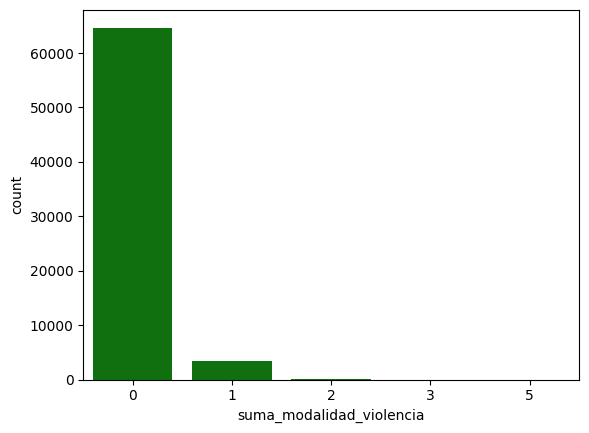

In [ ]:
#Visualizamos la columna suma de modalidad de violencias
sns.countplot(x='suma_modalidad_violencia', data=Linea144, color='green')
plt.show()

In [ ]:
Linea144[Linea144['suma_modalidad_violencia'].isin([3, 5])]

,Anio,Fecha,prov_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,poblacion_provincia,violencia_fisica_NO,...,violencia_reproductiva_NO,violencia_reproductiva_SI,violencia_obstetrica_NO,violencia_obstetrica_SI,violencia_mediatica_NO,violencia_mediatica_SI,violencia_otras_NO,violencia_otras_SI,suma_tipo_violencia,suma_modalidad_violencia
39827,2021,8/26/2021,Buenos Aires,Mujer,38.0,Argentina,Superior jerarquico,Varon,17569053,1,...,0,1,1,0,1,0,1,0,2,3
40480,2021,9/7/2021,Buenos Aires,Mujer,36.0,Argentina,Otro,Otro,17569053,1,...,0,1,0,1,1,0,1,0,1,3
50943,2020,3/8/2020,Buenos Aires,Mujer,42.0,Argentina,Ex pareja,Varon,17569053,0,...,0,1,0,1,0,1,1,0,4,5
60869,2020,8/4/2020,Ciudad Autónoma de Buenos Aires,Transgenero,47.0,Argentina,Superior jerarquico,Varon,3120612,0,...,1,0,1,0,0,1,1,0,4,3
69373,2020,12/23/2020,Buenos Aires,Mujer,21.0,Argentina,Otro,Otro,17569053,1,...,1,0,0,1,1,0,1,0,2,3


# Ver agrupamiento por años

In [ ]:
Linea144.columns

Index(['Anio', 'Fecha', 'prov_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia',
       'edad_persona_en_situacion_de_violencia',
       'pais_nacimiento_persona_en_situacion_de_violencia',
       'vinculo_con_la_persona_agresora', 'genero_de_la_persona_agresora',
       'poblacion_provincia', 'violencia_fisica_NO', 'violencia_fisica_SI',
       'violencia_psicologica_NO', 'violencia_psicologica_SI',
       'violencia_sexual_NO', 'violencia_sexual_SI',
       'violencia_economica_y_patrimonial_NO',
       'violencia_economica_y_patrimonial_SI', 'violencia_simbolica_NO',
       'violencia_simbolica_SI', 'violencia_domestica_NO',
       'violencia_domestica_SI', 'violencia_institucional_NO',
       'violencia_institucional_SI', 'violencia_laboral_NO',
       'violencia_laboral_SI', 'violencia_reproductiva_NO',
       'violencia_reproductiva_SI', 'violencia_obstetrica_NO',
       'violencia_obstetrica_SI', 'violencia_mediatica_NO',
       'violencia_mediat

## Modalidad de violencia

In [ ]:
Linea144['suma_modalidad_violencia'].value_counts()

suma_modalidad_violencia
0    64674
1     3465
2      126
3        4
5        1
Name: count, dtype: int64

In [ ]:
#ordenar por año suma_modalidad_violencia
Linea144.groupby('Anio')['suma_modalidad_violencia'].value_counts()

Anio  suma_modalidad_violencia
2020  0.0                         21849
      1.0                           851
      2.0                            18
      3.0                             2
      5.0                             1
2021  0.0                         18156
      1.0                          1156
      2.0                            51
      3.0                             2
2022  0.0                         17296
      1.0                          1077
      2.0                            46
2023  0.0                          7373
      1.0                           381
      2.0                            11
Name: count, dtype: int64

In [ ]:
#ordenar por año suma_modalidad_violencia quitando 0
Linea144[Linea144['suma_modalidad_violencia'] != 0].groupby('Anio')['suma_modalidad_violencia'].value_counts()

Anio  suma_modalidad_violencia
2020  1.0                          851
      2.0                           18
      3.0                            2
      5.0                            1
2021  1.0                         1156
      2.0                           51
      3.0                            2
2022  1.0                         1077
      2.0                           46
2023  1.0                          381
      2.0                           11
Name: count, dtype: int64

In [ ]:
#ordenar por año y provincia suma_modalidad_violencia quitando 0
Linea144[Linea144['suma_modalidad_violencia'] != 0].groupby(['Anio', 'prov_persona_en_situacion_violencia'])['suma_modalidad_violencia'].value_counts()

Anio  prov_persona_en_situacion_violencia  suma_modalidad_violencia
2020  Buenos Aires                         1.0                         470
                                           2.0                          11
                                           5.0                           1
                                           3.0                           1
      Catamarca                            1.0                           2
                                                                      ... 
2023  San Juan                             1.0                           1
      San Luis                             1.0                           5
      Santa Fe                             1.0                           9
      Santiago del Estero                  1.0                           1
      Tucumán                              1.0                           3
Name: count, Length: 111, dtype: int64

In [ ]:
#sumar por año y provincia suma_modalidad_violencia quitando 0
Linea144_tabla = Linea144[Linea144['suma_modalidad_violencia'] != 0].groupby(['Anio', 'prov_persona_en_situacion_violencia'])['suma_modalidad_violencia'].sum()
Linea144_tabla

Anio  prov_persona_en_situacion_violencia
2020  Buenos Aires                           500.0
      Catamarca                                2.0
      Chaco                                    9.0
      Chubut                                   3.0
      Ciudad Autónoma de Buenos Aires        234.0
                                             ...  
2023  San Juan                                 1.0
      San Luis                                 5.0
      Santa Fe                                 9.0
      Santiago del Estero                      1.0
      Tucumán                                  3.0
Name: suma_modalidad_violencia, Length: 83, dtype: float64

In [ ]:
#Transformamos la tabla
Linea144_tabla.unstack()

prov_persona_en_situacion_violencia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Buenos Aires,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,"Tierra del Fuego, Antártida e Islas del Atlántico Sur",Tucumán
Anio,,,,,,,,,,,,,,,,,,,,,
2020,500.0,2.0,9.0,3.0,234.0,6.0,20.0,9.0,2.0,5.0,...,6.0,1.0,8.0,2.0,5.0,1.0,32.0,4.0,1.0,13.0
2021,548.0,NaN,6.0,2.0,570.0,2.0,17.0,2.0,2.0,6.0,...,8.0,5.0,6.0,3.0,6.0,1.0,21.0,4.0,NaN,12.0
2022,485.0,2.0,7.0,3.0,540.0,5.0,15.0,1.0,3.0,9.0,...,3.0,7.0,5.0,1.0,10.0,NaN,18.0,5.0,1.0,11.0
2023,177.0,2.0,NaN,1.0,187.0,NaN,7.0,2.0,NaN,1.0,...,3.0,NaN,NaN,1.0,5.0,NaN,9.0,1.0,NaN,3.0


In [ ]:
#Creamos una tabla con la población provincial
Provincias_poblacion = pd.DataFrame(Linea144.groupby('prov_persona_en_situacion_violencia')['poblacion_provincia'].unique())
Provincias_poblacion

,poblacion_provincia
prov_persona_en_situacion_violencia,
Buenos Aires,[17569053]
Catamarca,[429556]
Chaco,"[1,142,963.00, 1142963]"
Chubut,[603120]
Ciudad Autónoma de Buenos Aires,[3120612]
Corrientes,[1197553]
Córdoba,"[3,978,984.00, 3978984]"
Entre Ríos,[1426426]
Formosa,[606041]


In [ ]:
#Reemplazar en el data frame original los valores con formato incorrecto en poblacion_provincia
Linea144.loc[Linea144['prov_persona_en_situacion_violencia'] == 'Chaco', 'poblacion_provincia'] = 1142963
Linea144.loc[Linea144['prov_persona_en_situacion_violencia'] == 'Córdoba', 'poblacion_provincia'] = 3978984

In [ ]:
Linea144['poblacion_provincia'].value_counts()

poblacion_provincia
17569053    38305
3120612     11946
3556522      3116
2014533      2593
1703186      2568
3978984      2101
1440672      1036
797955       1013
1142963       637
540905        562
818234        533
726590        518
1426426       499
1054028       449
1280960       418
1197553       414
762067        360
606041        276
429556        237
384607        224
603120        209
333473        114
366022         72
190641         70
Name: count, dtype: int64

In [ ]:
Provincias_poblacion = pd.DataFrame(Linea144.groupby('prov_persona_en_situacion_violencia')['poblacion_provincia'].unique())
Provincias_poblacion

,poblacion_provincia
prov_persona_en_situacion_violencia,
Buenos Aires,[17569053]
Catamarca,[429556]
Chaco,[1142963]
Chubut,[603120]
Ciudad Autónoma de Buenos Aires,[3120612]
Corrientes,[1197553]
Córdoba,[3978984]
Entre Ríos,[1426426]
Formosa,[606041]


In [ ]:
#Usar Provincias _población para dividir el valor de Linea144_tabla.unstack
Linea144_tabla['suma_modalidad_violencia'] = Linea144_tabla['suma_modalidad_violencia'].div(Provincias_poblacion['poblacion_provincia'])



KeyError: 'suma_modalidad_violencia'

In [ ]:
#tabla con anio, provincia, suma_modalidad_violencia sin ceros y población
Linea144_tabla = Linea144[Linea144['suma_modalidad_violencia'] != 0].groupby(['Anio', 'prov_persona_en_situacion_violencia', 'poblacion_provincia'])['suma_modalidad_violencia'].sum()
Linea144_tabla

Anio  prov_persona_en_situacion_violencia  poblacion_provincia
2020  Buenos Aires                         17569053               500.0
      Catamarca                            429556                   2.0
      Chaco                                1,142,963.00             9.0
      Chubut                               603120                   3.0
      Ciudad Autónoma de Buenos Aires      3120612                234.0
                                                                  ...  
2023  San Juan                             818234                   1.0
      San Luis                             540905                   5.0
      Santa Fe                             3556522                  9.0
      Santiago del Estero                  1054028                  1.0
      Tucumán                              1703186                  3.0
Name: suma_modalidad_violencia, Length: 84, dtype: float64

## Tipo de violencia

In [ ]:
Linea144['suma_tipo_violencia'].value_counts()

suma_tipo_violencia
3    24121
4    22539
5     9176
2     8729
6     2007
1     1582
0      116
Name: count, dtype: int64

In [ ]:
# ordenar por año suma_tipo_violencia
Linea144.groupby('Anio')['suma_tipo_violencia'].value_counts()

Anio  suma_tipo_violencia
2020  3                      8466
      4                      7205
      2                      3208
      5                      2733
      6                       531
      1                       499
      0                        79
2021  4                      6645
      3                      6548
      5                      2885
      2                      2175
      6                       658
      1                       435
      0                        19
2022  3                      6420
      4                      6039
      5                      2491
      2                      2409
      6                       557
      1                       492
      0                        11
2023  3                      2687
      4                      2650
      5                      1067
      2                       937
      6                       261
      1                       156
      0                         7
Name: count, dtype: in

In [ ]:
#ordenar por año suma_modalidad_violencia quitando 0
Linea144[Linea144['suma_tipo_violencia'] != 0].groupby('Anio')['suma_tipo_violencia'].value_counts()

Anio  suma_tipo_violencia
2020  3                      8466
      4                      7205
      2                      3208
      5                      2733
      6                       531
      1                       499
2021  4                      6645
      3                      6548
      5                      2885
      2                      2175
      6                       658
      1                       435
2022  3                      6420
      4                      6039
      5                      2491
      2                      2409
      6                       557
      1                       492
2023  3                      2687
      4                      2650
      5                      1067
      2                       937
      6                       261
      1                       156
Name: count, dtype: int64

In [ ]:
#ordenar por año y provincia suma_modalidad_violencia quitando 0
Linea144[Linea144['suma_tipo_violencia'] != 0].groupby(['Anio', 'prov_persona_en_situacion_violencia'])['suma_tipo_violencia'].value_counts()

Anio  prov_persona_en_situacion_violencia  suma_tipo_violencia
2020  Buenos Aires                         4                      4429
                                           3                      4283
                                           5                      1963
                                           2                      1642
                                           6                       438
                                                                  ... 
2023  Tucumán                              4                       110
                                           5                        36
                                           2                        32
                                           6                         6
                                           1                         3
Name: count, Length: 528, dtype: int64

In [ ]:
#sumar por año y provincia suma_modalidad_violencia quitando 0
Linea144[Linea144['suma_tipo_violencia'] != 0].groupby(['Anio', 'prov_persona_en_situacion_violencia'])['suma_tipo_violencia'].sum()

Anio  prov_persona_en_situacion_violencia                  
2020  Buenos Aires                                             46586
      Catamarca                                                  201
      Chaco                                                      684
      Chubut                                                     261
      Ciudad Autónoma de Buenos Aires                          10646
                                                               ...  
2023  Santa Cruz                                                  44
      Santa Fe                                                  1555
      Santiago del Estero                                        231
      Tierra del Fuego, Antártida e Islas del Atlántico Sur       37
      Tucumán                                                   1134
Name: suma_tipo_violencia, Length: 96, dtype: int64

# Correlaciones

# Estandarización de variables?